<a href="https://colab.research.google.com/github/navaidansari786/Applliances-Energy-Prediction/blob/main/Appliance_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Regression**

## Data-driven prediction of energy use of appliances   

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).

date time year-month-day hour:minute:second\ Appliances, energy use in Wh (Dependent variable)\ lights, energy use of light fixtures in the house in Wh (Drop this column)\ T1, Temperature in kitchen area, in Celsius\ RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2, Humidity in living room area, in %\ T3, Temperature in laundry room area\ RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4, Humidity in office room, in %\ T5, Temperature in bathroom, in Celsius\ RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius RH6, Humidity outside the building (north side), in %\ T7, Temperature in ironing room , in Celsius\ RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8, Humidity in teenager room 2, in %\ T9, Temperature in parents room, in Celsius\ RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from Chievres weather station), in %\ Wind speed (from Chievres weather station), in m/s\ Visibility (from Chievres weather station), in km\ Tdewpoint (from Chievres weather station), Â°C\ rv1, Random variable 1, nondimensional\ rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

# **Import Packages**
# First Import necessary packages and import the dataset

In [12]:
# Importing all the related libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

In [13]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Importing the appliances energy prediction data set
aep = pd.read_csv('/content/drive/MyDrive/Alma better/Capstone Project/Supervised ML - Regression/data_application_energy.csv')

In [16]:
aep

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [17]:
# No. of rows and columns
aep.shape

(19735, 29)

In [18]:
# Columns name information
aep.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [19]:
aep.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
aep.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [21]:
# Column description
aep.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [22]:
#data types present in the columns of data
aep.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [ ]:
aep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### As we can see only one column named date is object type and 2 columns named light and appliances are integer type and remaining all the columns are float type

In [23]:
# Total number of duplicate rows persent in this data.
duplicate_rows = aep[aep.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (0, 29)


### So there are no duplicate rows in the data set


# **Data Preparation**

# Dealing with Null values

In [24]:
# Null values 
aep.isnull().sum().sort_values(ascending=False)

rv2            0
T6             0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
RH_6           0
rv1            0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
date           0
dtype: int64

### There are no null values in the data

##As we are not trying to analyze the problem as Time Series rather regress on "Appliance" column therefore we are dropping the date column

In [25]:
aep= aep.drop(['date'], axis=1)

# **Data Preprocessing and Visualization**

In [26]:
# Train = 80%, Test = 20%
train, test = train_test_split(aep,test_size=0.20,random_state=40)

In [27]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,97.523436,3.827591,21.678518,40.262143,20.334025,40.426742,22.260086,39.250773,20.850323,39.032470,19.583439,50.920308,7.906445,54.667153,20.258524,35.395282,22.023867,42.945911,19.478627,41.561343,7.407244,755.550528,79.775016,4.051378,38.391414,3.760375,25.024810,25.024810
std,102.668076,7.954862,1.606283,3.981984,2.193174,4.076340,1.999775,3.258047,2.040500,4.351714,1.842384,8.956799,6.072646,31.128068,2.104972,5.126754,1.952412,5.238856,2.009700,4.163317,5.299596,7.394142,14.928167,2.453948,11.807620,4.187537,14.530871,14.530871
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.333333,24.000000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.730000,37.360000,18.790000,37.900000,20.790000,36.900000,19.500000,35.525625,18.288750,45.400000,3.656667,30.073667,18.700000,31.500000,20.790000,39.090000,18.000000,38.500000,3.700000,750.983333,70.333333,2.000000,29.000000,0.916667,12.552884,12.552884
50%,60.000000,0.000000,21.600000,39.626667,20.000000,40.500000,22.100000,38.560000,20.658333,38.400000,19.390000,49.090000,7.300000,55.300000,20.012698,34.882976,22.100000,42.400000,19.390000,40.900000,6.916667,756.100000,83.833333,3.666667,40.000000,3.450000,24.928013,24.928013
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.790000,22.100000,42.163333,20.615000,53.656167,11.260000,83.226806,21.600000,39.000000,23.390000,46.558750,20.600000,44.363333,10.400000,760.966667,91.666667,5.500000,40.000000,6.566667,37.752973,37.752973
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,25.963333,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


In [28]:
test.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000
mean,98.381049,3.699012,21.718784,40.250125,20.369996,40.395134,22.297711,39.209410,20.875381,39.004637,19.626775,51.065182,7.928915,54.376806,20.301436,35.359872,22.050066,42.897184,19.514633,41.516631,7.429348,755.410896,79.652027,3.993247,38.088513,3.762034,24.840928,24.840928
std,101.960204,7.860195,1.604995,3.969030,2.192215,4.044012,2.031232,3.240859,2.052530,4.299972,1.853380,9.278646,6.161386,31.239477,2.129884,5.064260,1.971198,5.166447,2.034639,4.104207,5.388713,7.420484,14.793748,2.440037,11.741336,4.223504,14.359756,14.359756
min,10.000000,0.000000,16.790000,27.023333,16.100000,21.040000,17.290000,28.860000,15.100000,28.778000,15.345000,30.030000,-6.010000,1.000000,15.396111,23.290000,16.362222,29.600000,14.890000,29.200000,-4.900000,729.300000,25.333333,0.000000,1.000000,-6.500000,0.005322,0.005322
25%,50.000000,0.000000,20.790000,37.300000,18.890000,37.790000,20.790000,36.900000,19.600000,35.557000,18.260000,45.400000,3.530000,29.936429,18.721500,31.426667,20.790000,39.030000,18.063333,38.530000,3.600000,750.700000,70.333333,2.000000,29.000000,0.850000,12.375697,12.375697
50%,60.000000,0.000000,21.600000,39.693333,20.000000,40.466667,22.100000,38.500000,20.666667,38.400000,19.390000,49.000000,7.300000,54.966667,20.100000,34.790000,22.133333,42.290000,19.390000,40.900000,6.900000,756.100000,83.500000,3.500000,40.000000,3.400000,24.768926,24.768926
75%,100.000000,0.000000,22.700000,43.060000,21.500000,43.126667,23.390000,41.663333,22.100000,42.090000,20.619643,53.700000,11.166667,83.156667,21.633333,39.033000,23.390000,46.516667,20.600000,44.290000,10.433333,760.800000,91.333333,5.333333,40.000000,6.575000,37.083798,37.083798
max,1070.000000,70.000000,26.200000,56.393333,29.790000,54.090000,29.236000,48.923333,26.180000,50.963333,25.466667,95.388333,28.236000,99.900000,26.000000,51.197778,27.200000,58.310556,24.500000,53.163333,25.966667,772.200000,100.000000,13.500000,66.000000,15.316667,49.996530,49.996530


In [29]:
## Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [30]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [31]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,21.678518,20.334025,22.260086,20.850323,19.583439,7.906445,20.258524,22.023867,19.478627,40.262143,40.426742,39.250773,39.032470,50.920308,54.667153,35.395282,42.945911,41.561343,7.407244,3.760375,79.775016,755.550528,4.051378,38.391414,3.827591,25.024810,25.024810
std,1.606283,2.193174,1.999775,2.040500,1.842384,6.072646,2.104972,1.952412,2.009700,3.981984,4.076340,3.258047,4.351714,8.956799,31.128068,5.126754,5.238856,4.163317,5.299596,4.187537,14.928167,7.394142,2.453948,11.807620,7.954862,14.530871,14.530871
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.333333,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.730000,18.790000,20.790000,19.500000,18.288750,3.656667,18.700000,20.790000,18.000000,37.360000,37.900000,36.900000,35.525625,45.400000,30.073667,31.500000,39.090000,38.500000,3.700000,0.916667,70.333333,750.983333,2.000000,29.000000,0.000000,12.552884,12.552884
50%,21.600000,20.000000,22.100000,20.658333,19.390000,7.300000,20.012698,22.100000,19.390000,39.626667,40.500000,38.560000,38.400000,49.090000,55.300000,34.882976,42.400000,40.900000,6.916667,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.928013,24.928013
75%,22.600000,21.500000,23.290000,22.100000,20.615000,11.260000,21.600000,23.390000,20.600000,43.090000,43.290000,41.790000,42.163333,53.656167,83.226806,39.000000,46.558750,44.363333,10.400000,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.752973,37.752973
max,26.260000,29.856667,29.200000,26.200000,25.795000,28.290000,25.963333,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [32]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     12182
10     1772
20     1313
30      446
40       69
50        5
60        1
Name: lights, dtype: int64

In [33]:
target_vars.describe()

,Appliances
count,15788.000000
mean,97.523436
std,102.668076
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


# **Observations**
Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house

Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

Lights column - Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence for now , I will dropping this column

In [34]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
l1 = aep.drop(['lights'], axis=1 , inplace= True) ;

In [35]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
14323,21.20,18.2,22.390000,21.39,19.963333,2.126667,20.361429,21.79,20.0,38.0,41.29,37.9,35.20,48.163333,47.196667,31.332857,42.79,41.09,3.566667,1.750000,88.000000,767.3,3.0,28.833333,0,10.870123,10.870123
8578,20.29,16.7,20.566667,19.79,17.790000,0.000000,19.390000,20.89,18.1,36.2,41.79,37.4,34.09,49.790000,70.863333,35.626667,43.00,41.06,-0.866667,-1.833333,93.333333,764.0,1.0,23.333333,0,9.366347,9.366347


# **Data Visualization**

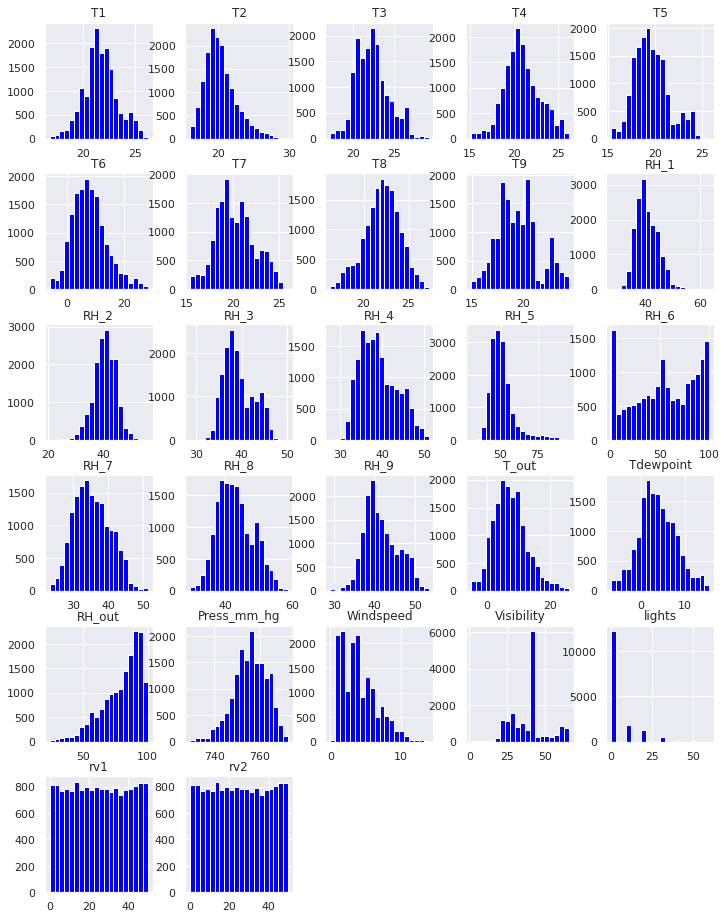

In [36]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16),color='blue') ;

### RH_6 , RH_out , rv1 , rv2 , Visibility , Windspeed are in the focus due to irregular distribution

### Using Plotly helps us visualize data better as it allows us to interact with the plot like zoom in to the distribution and hover around to locate the values corresponding to axis value

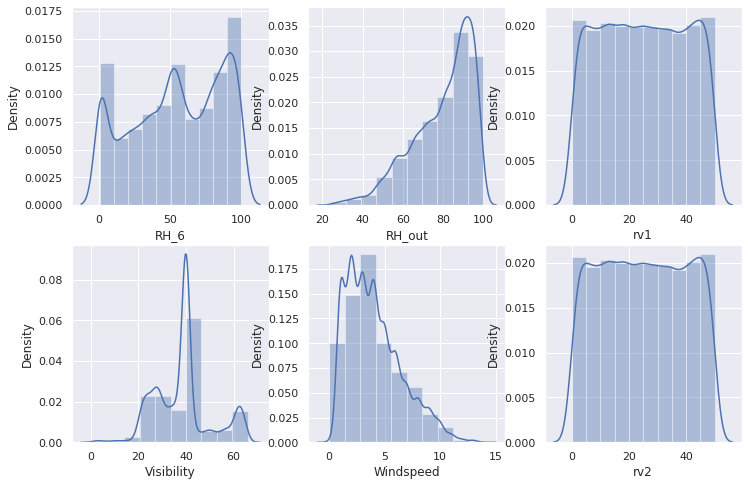

In [37]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,3,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])
vis5 = sns.distplot(feature_vars["rv1"],bins=10, ax=ax[0][2])
vis6 = sns.distplot(feature_vars["rv2"],bins=10, ax=ax[1][2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33a6b3da50>]],
      dtype=object)

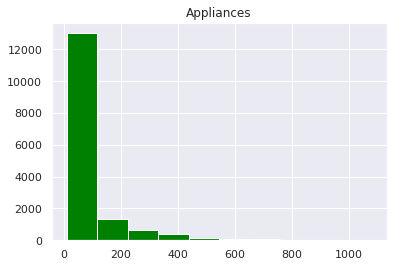

In [38]:
# Distribution of values in Applainces column
target_vars.hist(color='green',bins=10)

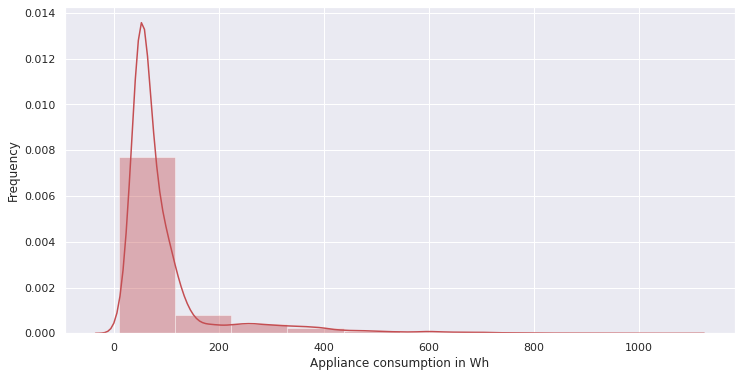

In [39]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars ,color="r",bins=10)

In [40]:
# Check the distribution of values in Appliances column
aep['Appliances'].value_counts().head(15)

50     4368
60     3282
40     2019
70     1560
80     1205
90     1015
100     978
110     736
30      723
120     502
20      343
130     330
140     223
150     144
160      90
Name: Appliances, dtype: int64

# **Observations**
Temperature - All the columns follow normal distribution except T9     
Humidity - All columns follow normal distribution except RH_6 and RH_out ,     primarly because these sensors are outside the house     
Appliance - This column is postively skewed , most the values are around mean   100 Wh . There are outliers in this column     
Visibilty - This column is negatively skewed        
Windspeed - This column is postively skewed      

In [41]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.315429
dtype: float64


# **Correlation Plots**

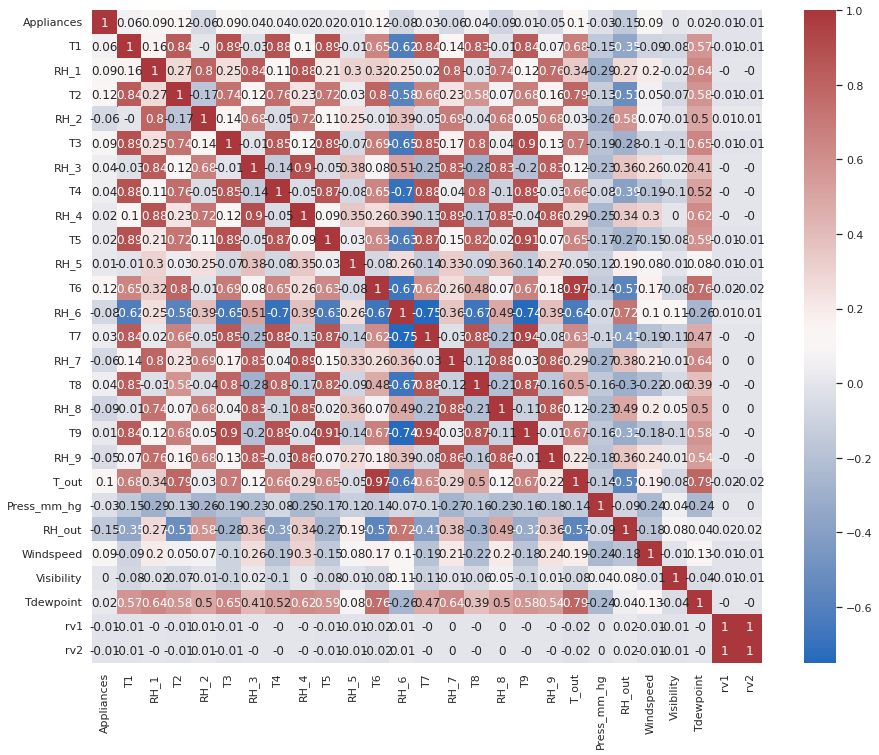

In [42]:
# Correlatrion of all about data

sns.set(rc={'figure.figsize':(15,12)})
aep = aep.corr().round(2)
sns.heatmap(data=aep, annot=True,cmap="vlag")

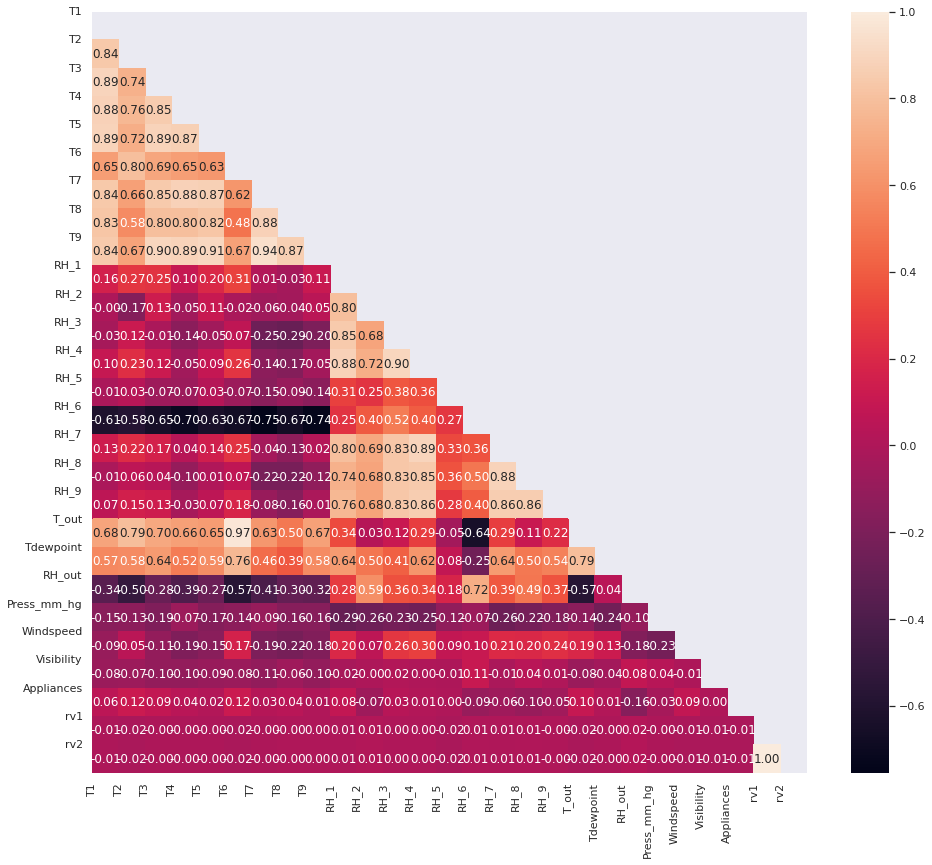

In [43]:
# Use the weather , temperature , applainces and random column to see the correlation

train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [44]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974542
T7    T9       0.944040
T5    T9       0.910518
T3    T9       0.900996
RH_3  RH_4     0.899459
RH_4  RH_7     0.894588
T1    T3       0.892857
T4    T9       0.888917
T3    T5       0.888649
T1    T5       0.885385
RH_7  RH_8     0.884228
T7    T8       0.881532
RH_1  RH_4     0.880205
T4    T7       0.877290
T1    T4       0.876996
T4    T5       0.872149
T5    T7       0.869847
T8    T9       0.868543
RH_7  RH_9     0.859545
RH_4  RH_9     0.857135
RH_8  RH_9     0.856992
T3    T4       0.852899
RH_4  RH_8     0.848080
T3    T7       0.846884
RH_1  RH_3     0.845058
T1    T9       0.843789
      T7       0.837853
      T2       0.836188
RH_3  RH_9     0.833754
      RH_7     0.833506
      RH_8     0.829869
T1    T8       0.825500
T5    T8       0.824341
T2    T6       0.800786
RH_1  RH_7     0.800779
      RH_2     0.798200
T4    T8       0.796485
T3    T8       0.795074
T2    T_out    0.791347
dtype: float64

In [45]:
# Correlation of all about dataset
aep.iloc[:,1:].corr()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
T1,1.000000,-0.181534,0.961676,-0.424633,0.991874,-0.516844,0.992262,-0.357564,0.993178,-0.494773,0.911111,-0.924272,0.982433,-0.287628,0.969320,-0.487305,0.987015,-0.378831,0.909228,-0.220718,-0.798954,-0.359214,-0.415556,0.686352,-0.207741,-0.207741
RH_1,-0.181534,1.000000,-0.073465,0.903259,-0.116423,0.920437,-0.255741,0.971164,-0.156492,0.576172,0.013424,0.472876,-0.309462,0.970708,-0.354612,0.915381,-0.235494,0.951431,0.041576,-0.611462,0.498210,0.466458,-0.134659,0.537302,-0.272677,-0.272677
T2,0.961676,-0.073465,1.000000,-0.406143,0.948639,-0.397699,0.942631,-0.232579,0.937870,-0.428482,0.970238,-0.886650,0.916115,-0.178605,0.879552,-0.392004,0.923962,-0.269652,0.968395,-0.247180,-0.836065,-0.180263,-0.415333,0.744897,-0.225201,-0.225201
RH_2,-0.424633,0.903259,-0.406143,1.000000,-0.349317,0.908316,-0.480184,0.908527,-0.374140,0.621394,-0.325993,0.690338,-0.508034,0.912426,-0.520923,0.933098,-0.438617,0.919876,-0.297490,-0.498771,0.781726,0.331970,-0.010516,0.267280,-0.176657,-0.176657
T3,0.991874,-0.116423,0.948639,-0.349317,1.000000,-0.471438,0.984830,-0.304453,0.994487,-0.494950,0.917762,-0.905346,0.976809,-0.232188,0.960246,-0.436288,0.989494,-0.323185,0.916741,-0.264455,-0.759356,-0.348758,-0.431125,0.736583,-0.217608,-0.217608
RH_3,-0.516844,0.920437,-0.397699,0.908316,-0.471438,1.000000,-0.586894,0.978182,-0.503671,0.715614,-0.328235,0.757339,-0.636050,0.954981,-0.669821,0.982990,-0.578384,0.973517,-0.301353,-0.442330,0.714361,0.549834,0.039796,0.195104,-0.173830,-0.173830
T4,0.992262,-0.255741,0.942631,-0.480184,0.984830,-0.586894,1.000000,-0.434883,0.989579,-0.547897,0.894145,-0.949912,0.994123,-0.363601,0.981090,-0.555721,0.993851,-0.451360,0.889209,-0.146381,-0.820174,-0.419283,-0.403437,0.634896,-0.169924,-0.169924
RH_4,-0.357564,0.971164,-0.232579,0.908527,-0.304453,0.978182,-0.434883,1.000000,-0.342150,0.653478,-0.147479,0.625342,-0.487597,0.989021,-0.531123,0.973598,-0.420070,0.988044,-0.119146,-0.527319,0.608372,0.551641,-0.045881,0.384394,-0.229291,-0.229291
T5,0.993178,-0.156492,0.937870,-0.374140,0.994487,-0.503671,0.989579,-0.342150,1.000000,-0.473894,0.893985,-0.909727,0.983323,-0.266465,0.972129,-0.464323,0.992490,-0.359783,0.893000,-0.240243,-0.756898,-0.394530,-0.418250,0.700429,-0.210507,-0.210507
RH_5,-0.494773,0.576172,-0.428482,0.621394,-0.494950,0.715614,-0.547897,0.653478,-0.473894,1.000000,-0.438437,0.662460,-0.583586,0.630342,-0.575759,0.699973,-0.558975,0.632486,-0.416093,-0.294719,0.612276,0.343775,0.038188,-0.085144,-0.140234,-0.140234


# **Observations based on correlation plot**

1.Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

2.Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

3.Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.

4.Random variables have no role to play


# **Data Preprocessing**


# **Splitting the data into training and testing dataset**

In [46]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

In [47]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [48]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [49]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

In [50]:
# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [51]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [52]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = aep[list(train_X.columns.values) + col_target ]

test = aep[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [54]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
Appliances,-0.527010,-0.416690,-0.497999,-0.465072,-0.629805,-0.408128,-0.350120,-0.723316,-0.887370,-0.552345,-0.787461,-0.435747,-0.006489,-1.057440,-0.927571,-0.960581,-0.486677,-1.130954,-0.409914,0.328081,0.107109,4.808417
T1,1.543502,1.303153,1.279981,1.304699,1.309136,1.235658,1.347165,-0.516185,-0.715416,-0.728091,-0.575641,-0.518600,-1.057699,-0.503592,-0.721444,-0.627003,0.894005,0.558650,-0.900720,-0.185437,-0.626059,0.048759
RH_1,-0.306743,-0.058390,-0.142403,-0.317591,-0.206358,-0.428422,-0.500512,1.969393,1.577312,1.456182,1.489605,0.765626,0.635917,1.324107,1.210996,1.291071,0.084640,0.773691,0.620779,-0.784541,0.555156,0.200663
T2,1.191075,1.685341,0.946610,1.051874,0.930263,0.870372,0.810050,-0.190693,-1.202620,-0.351492,-0.231433,-0.352894,-0.979831,-0.254360,-0.515317,-0.376820,1.155858,0.589370,-1.293365,-0.099851,-0.055817,0.352567
RH_2,-0.659170,-1.109405,-0.386875,-0.654690,-0.429225,-0.570477,-0.521997,1.377589,2.150493,1.054476,1.065965,0.558492,0.908453,1.019491,1.056401,1.068685,-0.653311,0.343610,1.381528,-0.656162,0.025646,-0.558857


In [55]:
sc_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
Appliances,-0.527010,-0.416690,-0.497999,-0.465072,-0.629805,-0.408128,-0.350120,-0.723316,-0.887370,-0.552345,-0.787461,-0.435747,-0.006489,-1.057440,-0.927571,-0.960581,-0.486677,-1.130954,-0.409914,0.328081,0.107109,4.808417
T1,1.543502,1.303153,1.279981,1.304699,1.309136,1.235658,1.347165,-0.516185,-0.715416,-0.728091,-0.575641,-0.518600,-1.057699,-0.503592,-0.721444,-0.627003,0.894005,0.558650,-0.900720,-0.185437,-0.626059,0.048759
RH_1,-0.306743,-0.058390,-0.142403,-0.317591,-0.206358,-0.428422,-0.500512,1.969393,1.577312,1.456182,1.489605,0.765626,0.635917,1.324107,1.210996,1.291071,0.084640,0.773691,0.620779,-0.784541,0.555156,0.200663
T2,1.191075,1.685341,0.946610,1.051874,0.930263,0.870372,0.810050,-0.190693,-1.202620,-0.351492,-0.231433,-0.352894,-0.979831,-0.254360,-0.515317,-0.376820,1.155858,0.589370,-1.293365,-0.099851,-0.055817,0.352567
RH_2,-0.659170,-1.109405,-0.386875,-0.654690,-0.429225,-0.570477,-0.521997,1.377589,2.150493,1.054476,1.065965,0.558492,0.908453,1.019491,1.056401,1.068685,-0.653311,0.343610,1.381528,-0.656162,0.025646,-0.558857


In [56]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [57]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [58]:
train_y.head()

Appliances    4.808417
T1            0.048759
RH_1          0.200663
T2            0.352567
RH_2         -0.558857
Name: Appliances, dtype: float64

# We will be looking at following Algorithms

# Improved Linear regression models

# 1.Ridge regression

# 2.Lasso regression

In [59]:
from sklearn.linear_model import Ridge, Lasso
import sklearn.metrics as metrics

In [60]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()]
]

In [63]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [67]:
model_data

[{'Name': 'Lasso: ',
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0,
  'Train_R2_Score': 0.0,
  'Train_Time': 0.005479335784912109},
 {'Name': 'Ridge: ',
  'Test_R2_Score': 0.4104769545945618,
  'Test_RMSE_Score': 0.7678040410192162,
  'Train_R2_Score': 0.4104769545945618,
  'Train_Time': 0.006245136260986328}]

In [68]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

In [69]:
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.005479,0.000000,0.000000,1.000000
1,Ridge:,0.006245,0.410477,0.410477,0.767804


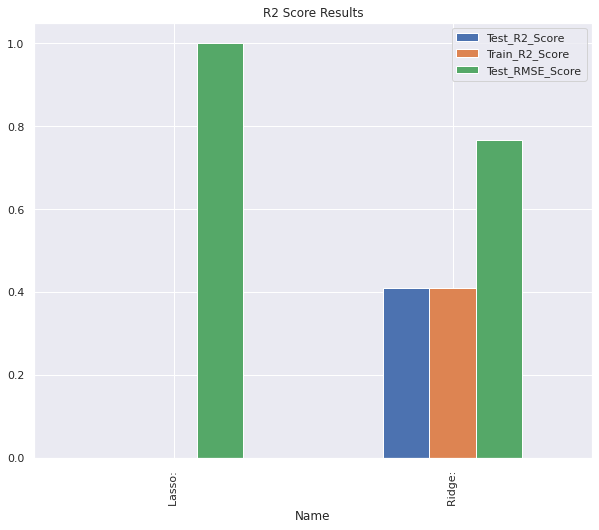

In [70]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

# **Obervations**
Best results over test set are given by Ridge with R2 score of 0.41  
Least RMSE score is also by Ridge 0.76   
Lasso regularization over Linear regression was worst performing model

# **Linear Regression results**

In [71]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(train_X, train_y)

LinearRegression()

In [72]:
regressor.score(train_X, train_y)

0.899112356007367

In [73]:
# Predicting the Test set results
y_pred = regressor.predict(test_X)

In [74]:
# Predicting the Train set results
y_train_pred = regressor.predict(train_X)

In [75]:
y_pred[1:5]

array([ 0.20515237,  0.90612475, -0.18210929, -1.19269016])

In [76]:
test_y[1:5]

T1      0.048759
RH_1    0.200663
T2      0.352567
RH_2   -0.558857
Name: Appliances, dtype: float64

In [77]:
# Regression coefficient
regressor.coef_

array([ 20.63037418, -32.6147587 ,   4.00472511,  -0.14239409,
        -1.22894818,  -1.84219654,  -1.60507366,  19.72783692,
       -25.04519594,  -0.88495743,   3.72252755,   0.23004206,
        -6.42548114,   1.76477216,  -3.37639194,   3.21979144,
         6.77937008,  -3.20478187,   5.82255283,  -0.68276765,
        -0.60316489])

In [78]:
regressor.intercept_

2.6760938116178967e-15

In [79]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))  
  print('r2_score is {}'.format(r2_score(actual, predicted)))

In [80]:
# Training dataset metrics
print_metrics(train_y, y_train_pred)

MSE is 0.10088764399263299
RMSE is 0.3176281536524006
RMSE is 0.899112356007367
MAE is 0.2370964713342289
r2_score is 0.899112356007367


In [81]:
# Test dataset metrics
print_metrics(test_y, y_pred)

MSE is 0.10088764399263299
RMSE is 0.3176281536524006
RMSE is 0.899112356007367
MAE is 0.2370964713342289
r2_score is 0.899112356007367


In [82]:
# Adjusted R2

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [83]:
adjusted_r2(len(train_y),len(feature_vars), train_y, y_train_pred)

1.0001664178875656

# **Ridge Regression**

Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

In [84]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.1)

In [85]:
# Fitting train data on ridge
ridge.fit(train_X,train_y)

Ridge(alpha=0.1)

In [86]:
# Ridge Score
ridge.score(train_X, train_y)

0.5549765357980354

In [87]:
y_pred_r = ridge.predict(test_X)

In [88]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))  
  print('r2_score is {}'.format(r2_score(actual, predicted)))

In [89]:
# Test dataset metrics
print_metrics(test_y, y_pred_r)

MSE is 0.4450234642019646
RMSE is 0.6671007901374159
RMSE is 0.5549765357980354
MAE is 0.38705573881300664
r2_score is 0.5549765357980354


Text(0, 0.5, 'Predicted Appliances')

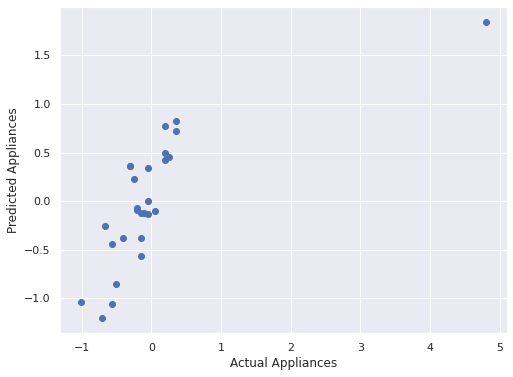

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(test_y, y_pred_r)
plt.xlabel('Actual Appliances')
plt.ylabel('Predicted Appliances')

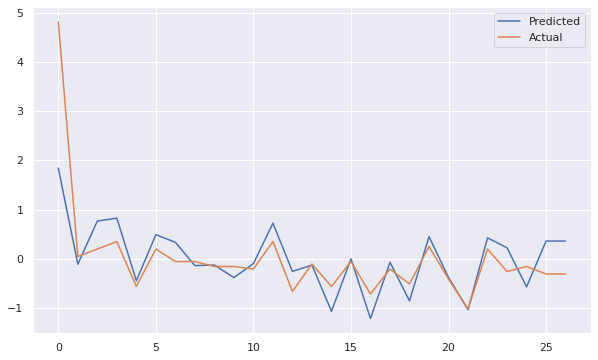

In [91]:
# Plotting graph between predicted and actual
plt.figure(figsize=(10,6))
plt.plot((y_pred_r))
plt.plot((np.array(test_y)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

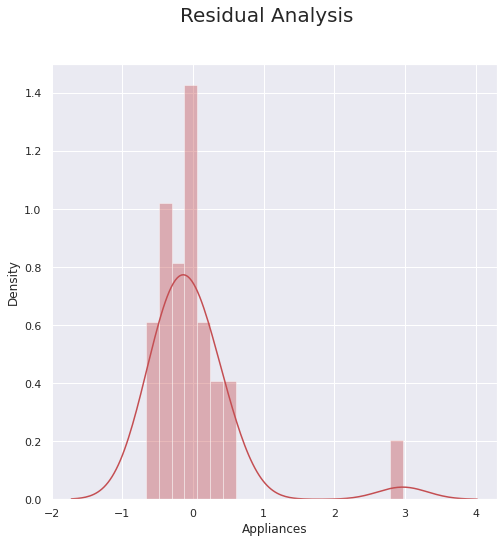

In [92]:
# Residual Analysis

fig=plt.figure(figsize=(8,8))
  
sns.distplot(((test_y) - (y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

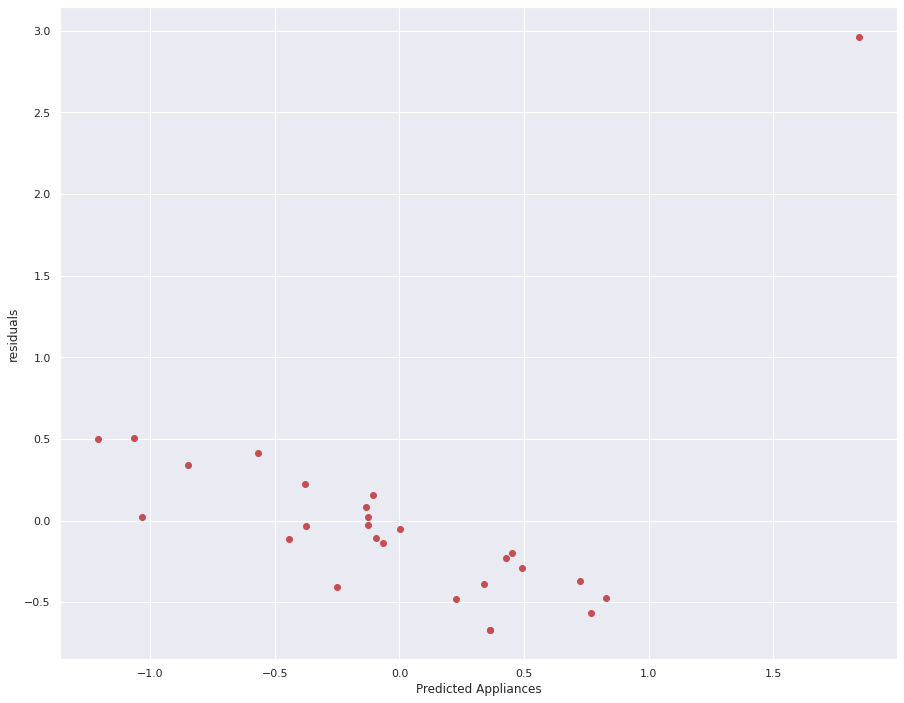

In [93]:
### Heteroscadacity

plt.scatter((y_pred_r),(test_y)-(y_pred_r),c='r')
plt.xlabel('Predicted Appliances')
plt.ylabel('residuals')

## Running Grid Search Cross Validation for Ridge Regression

---



In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
# Hyperparameter tuning

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(train_X,train_y)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [96]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -1.229713223394277


In [97]:
# Model Prediction
y_pred_ridge = ridge_regressor.predict(test_X)

In [98]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))  
  print('r2_score is {}'.format(r2_score(actual, predicted)))

In [99]:
# Test dataset metrics
print_metrics(test_y, y_pred_ridge)

MSE is 0.8956510180189512
RMSE is 0.9463884075890571
RMSE is 0.1043489819810488
MAE is 0.4325725568861176
r2_score is 0.1043489819810488


Text(0, 0.5, 'Predicted Appliances')

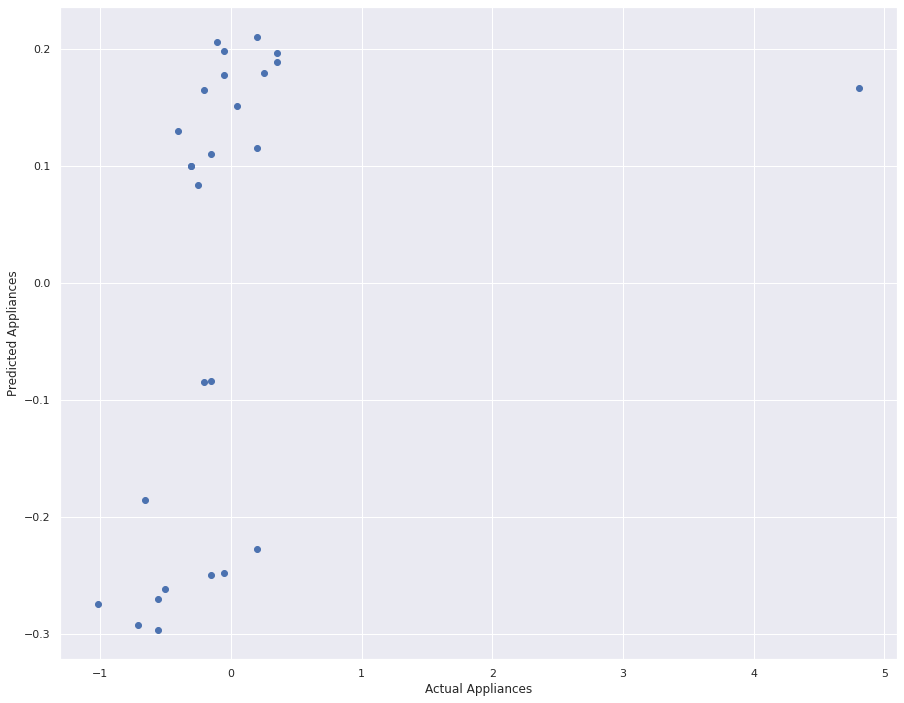

In [100]:
plt.scatter((test_y),(y_pred_ridge))
plt.xlabel('Actual Appliances')
plt.ylabel('Predicted Appliances')

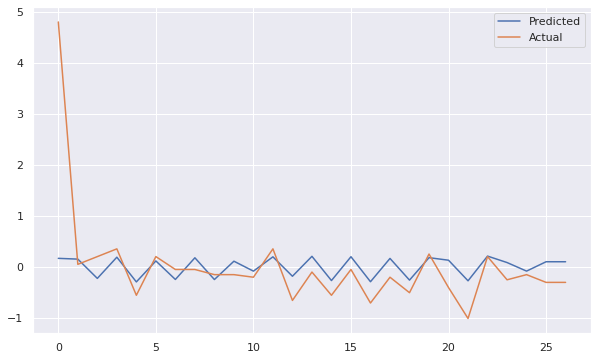

In [101]:
plt.figure(figsize=(10,6))
plt.plot((y_pred_ridge))
plt.plot((np.array(test_y)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

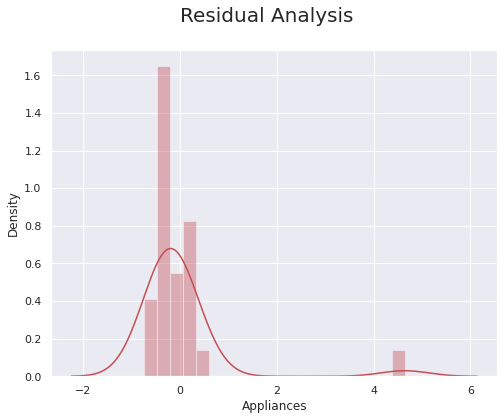

In [102]:
#Residual Analysis

fig=plt.figure(figsize=(8,6))
  
sns.distplot(((test_y)- (y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

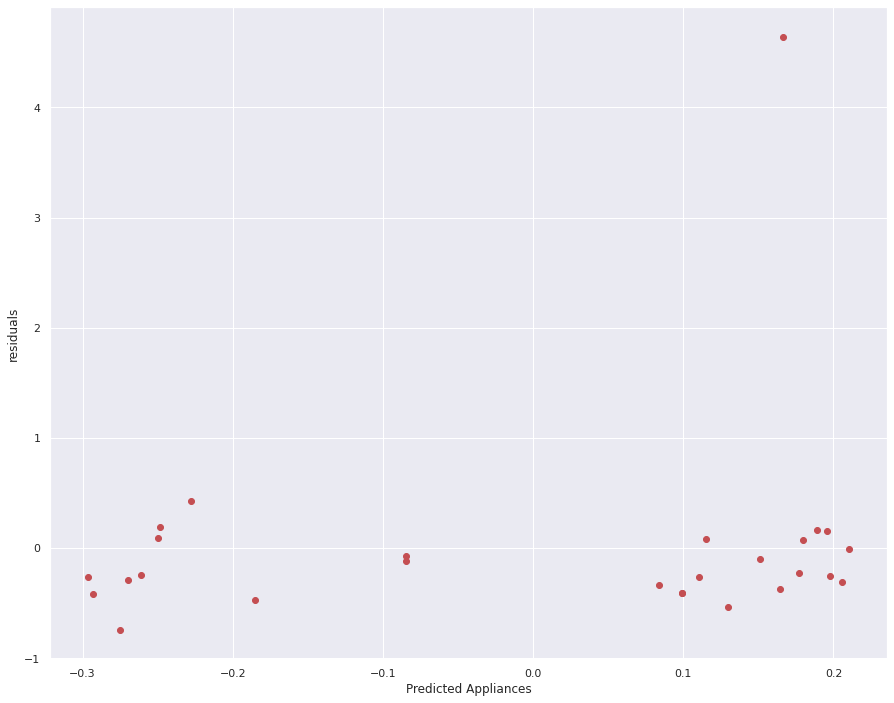

In [103]:
### Heteroscadacity

plt.scatter((y_pred_ridge),(test_y)-(y_pred_ridge),c='r')
plt.xlabel('Predicted Appliances')
plt.ylabel('residuals')

# **Lasso Regression**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [104]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(train_X, train_y)

Lasso(alpha=0.005, max_iter=3000)

In [105]:
lasso.score(train_X, train_y)

0.5855442985629593

In [106]:
y_pred_l = lasso.predict(test_X)

In [107]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))  
  print('r2_score is {}'.format(r2_score(actual, predicted)))

In [108]:
# Test dataset metrics
print_metrics(test_y, y_pred_l)

MSE is 0.41445570143704064
RMSE is 0.6437823401096372
RMSE is 0.5855442985629593
MAE is 0.377215980888542
r2_score is 0.5855442985629593


Text(0, 0.5, 'Predicted Appliances')

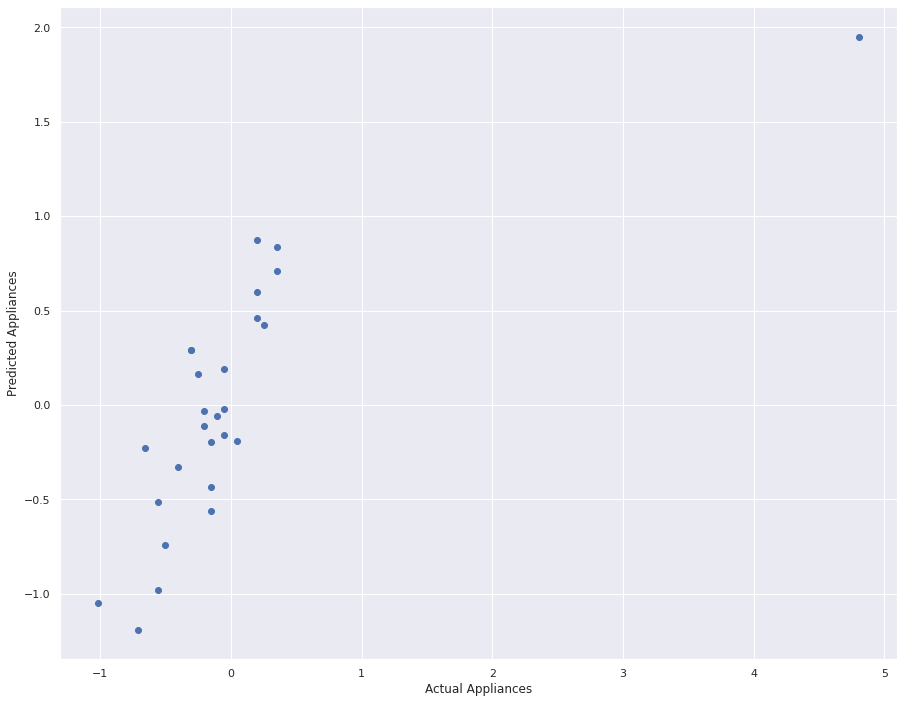

In [109]:
plt.scatter((test_y),(y_pred_l))
plt.xlabel('Actual Appliances')
plt.ylabel('Predicted Appliances')

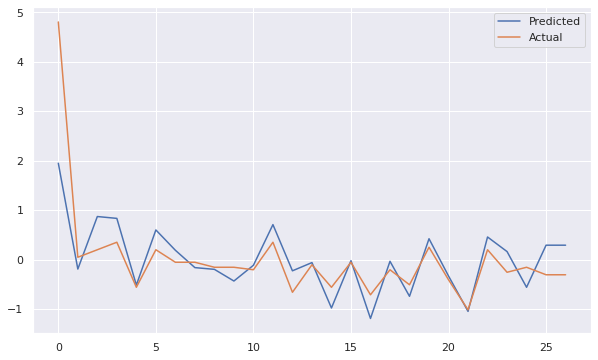

In [110]:
plt.figure(figsize=(10,6))
plt.plot((y_pred_l))
plt.plot(np.array((test_y)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

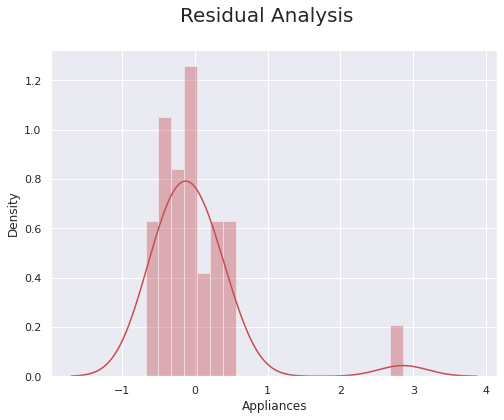

In [111]:
#Residual Analysis

fig=plt.figure(figsize=(8,6))
  
sns.distplot(((test_y)- (y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

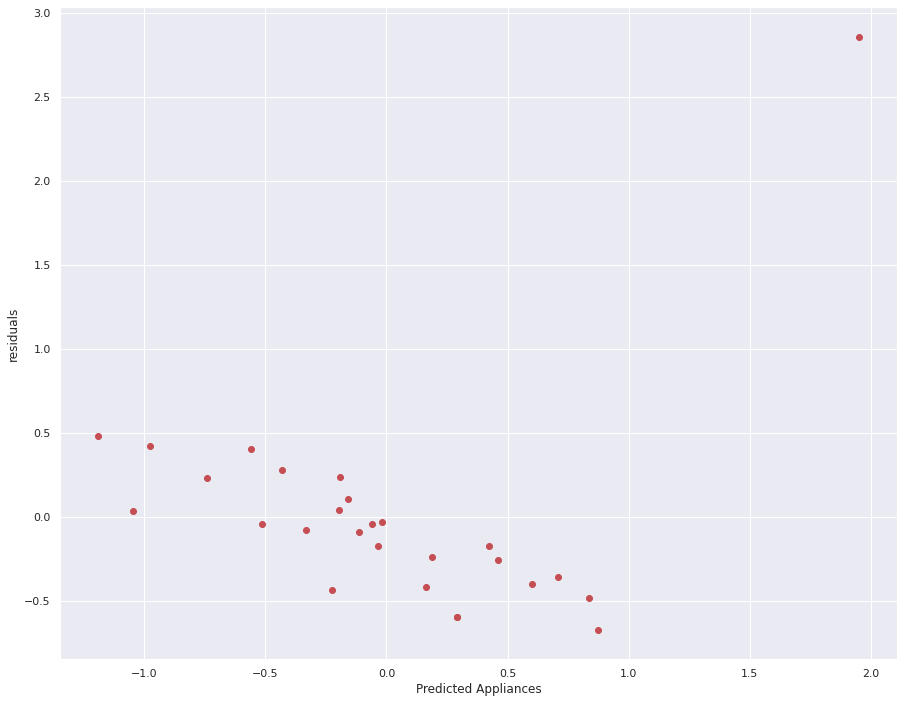

In [112]:
### Heteroscadacity

plt.scatter((y_pred_l),(test_y)-(y_pred_l),c='r')
plt.xlabel('Predicted Appliances')
plt.ylabel('residuals')

## **Implementing Cross-Validation Procedure for Lasso**

---



In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(train_X, train_y)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [115]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -1.1165718972968455


In [116]:
y_pred_lasso = lasso_regressor.predict(test_X)

In [117]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))  
  print('r2_score is {}'.format(r2_score(actual, predicted)))

In [118]:
# Test dataset metrics
print_metrics(test_y, y_pred_lasso)

MSE is 1.0
RMSE is 1.0
RMSE is 0.0
MAE is 0.47522948814613164
r2_score is 0.0


Text(0, 0.5, 'Predicted Appliances')

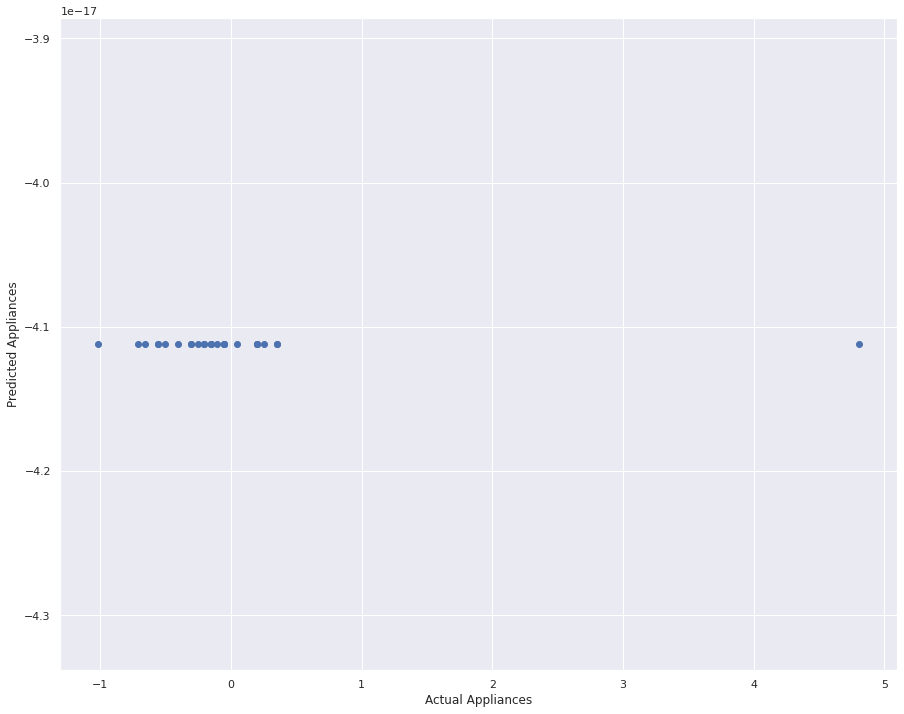

In [119]:
plt.scatter((test_y), (y_pred_lasso))
plt.xlabel('Actual Appliances')
plt.ylabel('Predicted Appliances')

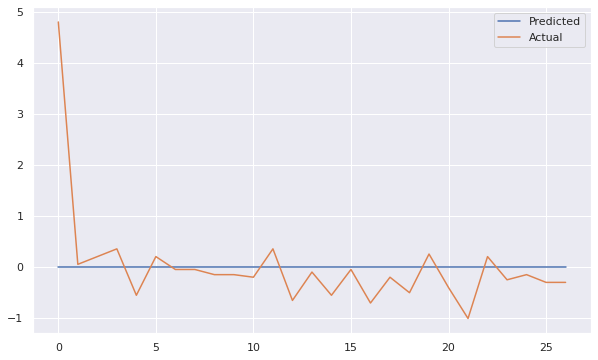

In [120]:
plt.figure(figsize=(10,6))
plt.plot((y_pred_lasso))
plt.plot((np.array(test_y)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

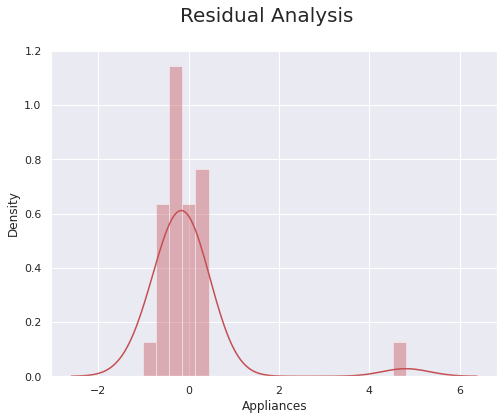

In [121]:
# Residual Analysis

fig=plt.figure(figsize=(8,6))
  
sns.distplot(((test_y)- (y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

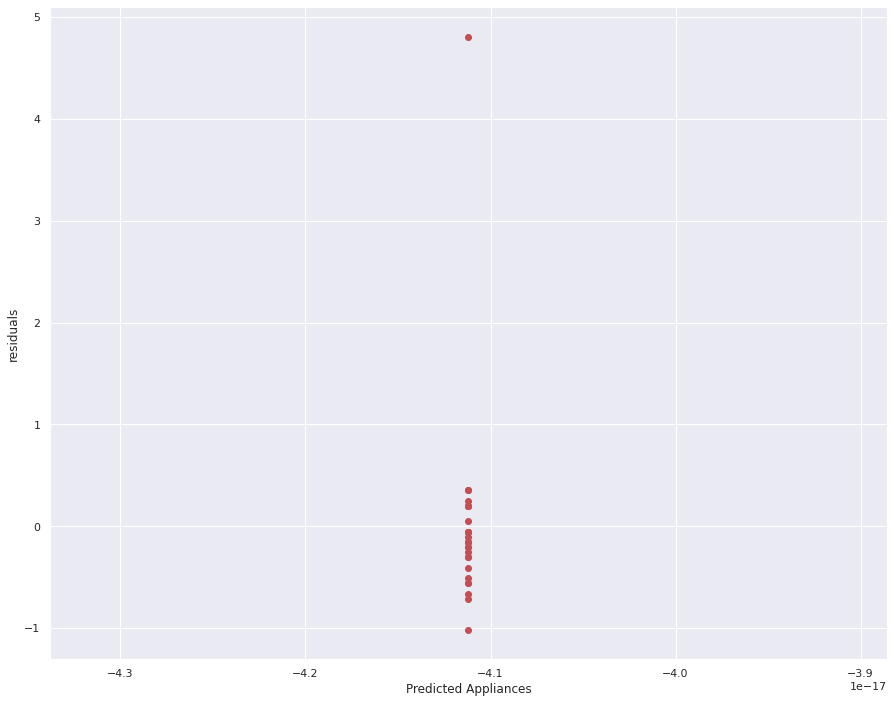

In [122]:
### Heteroscadacity

plt.scatter((y_pred_lasso),(test_y)-(y_pred_lasso),c='r')
plt.xlabel('Predicted Appliances')
plt.ylabel('residuals')

# **Conclusion**

## According to best fit model , the 5 most and least important features
## The top 3 important features are humidity attributes, which leads to the conclusion that humidity affects power consumption more than temperature. Windspeed is least important as the speed of wind doesn’t affect power consumption inside the house. So controlling humidity inside the house may lead to energy savings.


# Thanks:)